In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PRAJJWALmehta/Machine-Learning-/main/Data/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [3]:
df.shape

(5000, 6)

### a) Dividing the Dataset 

In [4]:

X = df.iloc[:, 0:5]
Y = df['Price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [6]:
X_train.shape

(3500, 5)

### b) Scaling the values

In [7]:
# checking the standard deviations of different attributes
X_train.std()

Avg. Area Income                10762.023396
Avg. Area House Age                 0.993156
Avg. Area Number of Rooms           1.004532
Avg. Area Number of Bedrooms        1.241804
Area Population                  9984.078008
dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

### c) dividing the features into five folds

In [146]:
from sklearn.model_selection import KFold
folds = KFold(5)

### Least Square Error Fit

In [163]:
def LSEf(Xa, Ya):
  # mean of values
  mean_x = Xa.mean()
  mean_y = Ya.mean()

  # total number of values 
  n = len(Xa) 

  # for calculating slope and y intercept
  numer = 0
  denom = 0

  for i in range(n):
    numer += (Xa.iloc[i] - mean_x)*(Ya.iloc[i] - mean_y)
    denom += (Xa.iloc[i] - mean_x)**2

  m = numer/denom
  c = mean_y - (m*mean_x)

  max_x = np.max(Xa) + 100
  min_x = np.min(Xa) - 100

  x = np.linspace(min_x, max_x, 1000)
  y = c + m*x

  plt.plot(x, y, c = '#58b970', label = 'line of regression')

  #plotting scatter plot
  plt.scatter(Xa, Ya, c = '#ef5423', label = 'Scatter plot')

  plt.xlabel('Average Area Income')
  plt.ylabel('Price of House')
  plt.legend()
  plt.show()


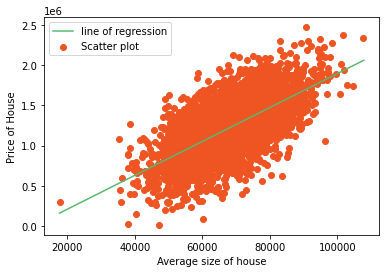

In [122]:
LSEf(X_train.iloc[:,0], Y_train)

### Calculating R2 Score

In [143]:
def calcR2(Xa, Ya):
  n = len(Ya)
  ss_tot = 0
  ss_res = 0

  numer = 0
  denom = 0

  mean_x = Xa.mean()
  mean_y = Ya.mean()

  for i in range(n):
    numer += (Xa.iloc[i] - mean_x)*(Ya.iloc[i] - mean_y)
    denom += (Xa.iloc[i] - mean_x)**2

  m = numer/denom
  c = mean_y - (m*mean_x)

  for i in range(n):
    y_pred = c + m*Xa.iloc[i]
    ss_tot += (Ya.iloc[i] - mean_y)**2
    ss_res += (Ya.iloc[i] - y_pred) **2

  r2 = 1 - (ss_res/ss_tot)
  return r2


In [144]:
x = calcR2(X_train.iloc[:,0], Y_train)
x

0.40741969200981676

### model selection

In [141]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Cross validation

In [151]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X_train, Y_train, cv = folds)
results.mean()

0.9183405770282043

In [152]:
results = cross_val_score(model, X_test, Y_test, cv = folds)
results.mean()

0.9138387953962818

In [161]:
calcR2(X_test.iloc[:,0], Y_test)

0.41392744697357575

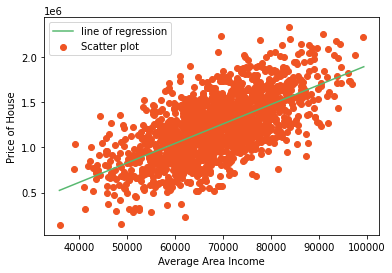

In [164]:
LSEf(X_test.iloc[:,0], Y_test)